# CNN Models

The goal of this note book is to build a Convolutional Neural Network model and compare the results.

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from datetime import datetime
import random

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import confusion_matrix

import util as ut # Checking result
from malig_data import * #Accessing Data

train_img shape (5421, 12288)
train_images shape (5421, 64, 64, 3)
train_labels shape (5421, 2)
test_img shape (1355, 12288)
test_images shape (1355, 64, 64, 3)
test_labels shape (1355, 2)
val_img shape (753, 12288)
val_images shape (753, 64, 64, 3)
val_labels shape (753, 2)
smote_img shape (9358, 12288)
smote_images shape (9358, 64, 64, 3)
smote_labels shape (9358,)
adasyn_img shape (9265, 12288)
adasyn_images shape (9265, 64, 64, 3)
adasyn_labels shape (9265,)
train_y shape (5421, 1)
test_y shape (1355, 1)
val_y shape (753, 1)


## CNN Model

This CNN model is made with 4 hidden layers with few regularizer and dropout layers to prevent overfitting of the model since CNN tends to overfit.

In [11]:
def CNN_model(x, y, val_x, val_y, filepath, epochs=150, batch_size=32):
    """ CNN model function that returns the model and the history.
        x: train image
        y: train target
        val_x: test image
        val_y: test target
        filepath: where the model to be saved
        epochs: default at 150
        batch_size: default at 32"""
    
    start_time = datetime.now()
    random.seed(123)
    cnn_model = models.Sequential()
    cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(64,64,3)))#1st Hidden Layer
    cnn_model.add(layers.MaxPooling2D((2, 2))) #Maxpooling to 1st Layer
    cnn_model.add(layers.Dropout(.3)) #Dropout layer to 1st layer

    cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(0.005)))#2nd Hidden Layer
    cnn_model.add(layers.MaxPooling2D((2, 2))) #Maxpooling to 2nd Layer
    cnn_model.add(layers.Dropout(.3)) #Dropout layer to 2nd layer

    cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(0.005)))#3rd Hidden Layer
    cnn_model.add(layers.MaxPooling2D((2, 2))) #Maxpooling to 3rd Layer
    cnn_model.add(layers.Dropout(.3)) #Dropout layer to 3rd layer

    cnn_model.add(layers.Flatten()) #Flattening Layer
    cnn_model.add(layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.005)))#4th Hidden Layer
    cnn_model.add(layers.Dense(1, activation='sigmoid')) #Output Layer

    cnn_model.compile(loss='binary_crossentropy',
                  optimizer="adam", # For CNN model we will use 'adam' as an optimizer which is most commonly used optimizer
                  metrics=['accuracy'])

    cnn_early_stopping = [EarlyStopping(monitor='val_loss', patience=50),
                      ModelCheckpoint(filepath=filepath,
                                     monitor='val_loss',
                                     save_best_only=True)]

    cnn_history = cnn_model.fit(x, y,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(val_x, val_y),
                        callbacks=cnn_early_stopping)

    end_time = datetime.now()

    print('Time elapsed', end_time - start_time)
    return cnn_model, cnn_history


In [25]:
filepath = '../models/basic_cnn.h5'
basic_cnn_model, basic_cnn_history = CNN_model(train_images, train_y, 
                                               test_images, test_y,
                                               filepath=filepath,
                                               epochs=200,
                                               batch_size=32)

Epoch 1/200
170/170 [==============================] - 24s 143ms/step - loss: 0.7213 - accuracy: 0.8622 - val_loss: 0.4806 - val_accuracy: 0.8657
Epoch 2/200
170/170 [==============================] - 24s 144ms/step - loss: 0.3754 - accuracy: 0.8840 - val_loss: 0.3768 - val_accuracy: 0.8989
Epoch 3/200
170/170 [==============================] - 26s 156ms/step - loss: 0.3108 - accuracy: 0.8961 - val_loss: 0.3144 - val_accuracy: 0.9048
Epoch 4/200
170/170 [==============================] - 30s 177ms/step - loss: 0.2943 - accuracy: 0.9000 - val_loss: 0.2791 - val_accuracy: 0.9070
Epoch 5/200
170/170 [==============================] - 29s 171ms/step - loss: 0.2894 - accuracy: 0.8998 - val_loss: 0.2657 - val_accuracy: 0.9092
Epoch 6/200
170/170 [==============================] - 27s 157ms/step - loss: 0.2925 - accuracy: 0.9022 - val_loss: 0.2812 - val_accuracy: 0.9151
Epoch 7/200
170/170 [==============================] - 24s 144ms/step - loss: 0.2680 - accuracy: 0.9072 - val_loss: 0.3189 -

Epoch 57/200
170/170 [==============================] - 22s 128ms/step - loss: 0.2128 - accuracy: 0.9305 - val_loss: 0.2023 - val_accuracy: 0.9417
Epoch 58/200
170/170 [==============================] - 20s 118ms/step - loss: 0.2109 - accuracy: 0.9317 - val_loss: 0.2021 - val_accuracy: 0.9365
Epoch 59/200
170/170 [==============================] - 20s 120ms/step - loss: 0.2135 - accuracy: 0.9327 - val_loss: 0.1951 - val_accuracy: 0.9402
Epoch 60/200
170/170 [==============================] - 20s 117ms/step - loss: 0.2126 - accuracy: 0.9286 - val_loss: 0.2009 - val_accuracy: 0.9387
Epoch 61/200
170/170 [==============================] - 20s 119ms/step - loss: 0.2115 - accuracy: 0.9329 - val_loss: 0.2022 - val_accuracy: 0.9321
Epoch 62/200
170/170 [==============================] - 23s 134ms/step - loss: 0.2114 - accuracy: 0.9325 - val_loss: 0.2068 - val_accuracy: 0.9351
Epoch 63/200
170/170 [==============================] - 23s 137ms/step - loss: 0.2135 - accuracy: 0.9316 - val_loss: 0

170/170 [==============================] - 32s 191ms/step - loss: 0.1956 - accuracy: 0.9364 - val_loss: 0.1863 - val_accuracy: 0.9432
Epoch 168/200
170/170 [==============================] - 32s 191ms/step - loss: 0.1946 - accuracy: 0.9364 - val_loss: 0.1848 - val_accuracy: 0.9454
Epoch 169/200
170/170 [==============================] - 34s 198ms/step - loss: 0.1921 - accuracy: 0.9375 - val_loss: 0.1903 - val_accuracy: 0.9351
Epoch 170/200
170/170 [==============================] - 34s 197ms/step - loss: 0.1970 - accuracy: 0.9360 - val_loss: 0.1764 - val_accuracy: 0.9454
Epoch 171/200
170/170 [==============================] - 39s 231ms/step - loss: 0.1932 - accuracy: 0.9371 - val_loss: 0.1761 - val_accuracy: 0.9454
Epoch 172/200
170/170 [==============================] - 42s 248ms/step - loss: 0.1928 - accuracy: 0.9389 - val_loss: 0.1925 - val_accuracy: 0.9402
Epoch 173/200
170/170 [==============================] - 41s 244ms/step - loss: 0.1951 - accuracy: 0.9360 - val_loss: 0.1822 -

In [26]:
cnn_saved_model = load_model(filepath)

cnn_results_train = cnn_saved_model.evaluate(train_images, train_y)
print(f'Training Loss: {cnn_results_train[0]:.3} \nTraining Accuracy: {cnn_results_train[1]:.3}')

print('----------')

cnn_results_test = cnn_saved_model.evaluate(val_images, val_y)
print(f'Test Loss: {cnn_results_test[0]:.3} \nTest Accuracy: {cnn_results_test[1]:.3}')

170/170 [==============================] - 5s 29ms/step - loss: 0.1832 - accuracy: 0.9408
Training Loss: 0.183 
Training Accuracy: 0.941
----------
24/24 [==============================] - 1s 41ms/step - loss: 0.1888 - accuracy: 0.9349
Test Loss: 0.189 
Test Accuracy: 0.935


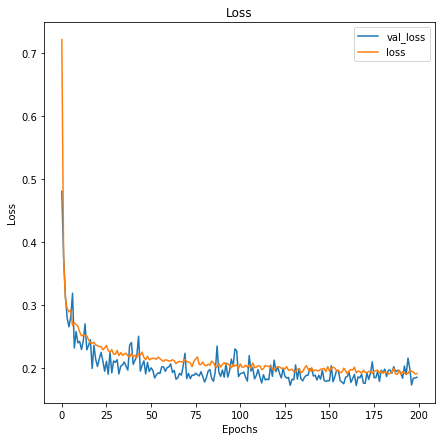

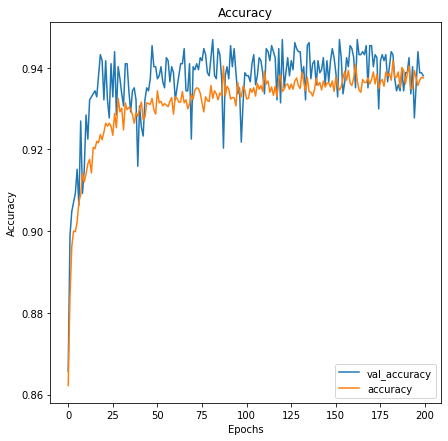

In [27]:
title = "../reports/Basic CNN Model: Iteration of Loss Graph"
ut.training_results_Loss(basic_cnn_history, title=title)
title = '../reports/Basic CNN Model: Iteration of Accuracy Graph'
ut.training_results_Accuracy(basic_cnn_history, title=title)

In [28]:
index=["Actual Malig", "Actual Benign"]
columns=["Predicted Malig", "Predicted Benign"]
basic_cnn_predictions = cnn_saved_model.predict_classes(val_images)
basic_cnn_cm = confusion_matrix(val_y, basic_cnn_predictions, labels=[0,1])
ut.cm_df(basic_cnn_cm, index, columns)

,Predicted Malig,Predicted Benign
Actual Malig,81,40
Actual Benign,9,623


Although result accuracy seems similar to Neural Network model, the perfomance graph is much more stable and we can predict that when the model is ran mutiple times, it will probably bring us similar results.

## Smote CNN Model

In [29]:
filepath = '../models/smote_cnn.h5'
smote_cnn_model, smote_cnn_history = CNN_model(smote_images, smote_labels, 
                                               test_images, test_y,
                                               filepath=filepath,
                                               epochs=200,
                                               batch_size=32)

Epoch 1/200
293/293 [==============================] - 42s 144ms/step - loss: 0.6925 - accuracy: 0.7483 - val_loss: 0.7875 - val_accuracy: 0.5181
Epoch 2/200
293/293 [==============================] - 35s 121ms/step - loss: 0.3976 - accuracy: 0.8635 - val_loss: 0.9107 - val_accuracy: 0.4258
Epoch 3/200
293/293 [==============================] - 35s 118ms/step - loss: 0.3831 - accuracy: 0.8681 - val_loss: 0.5169 - val_accuracy: 0.8207
Epoch 4/200
293/293 [==============================] - 34s 117ms/step - loss: 0.3708 - accuracy: 0.8708 - val_loss: 0.6744 - val_accuracy: 0.6384
Epoch 5/200
293/293 [==============================] - 36s 121ms/step - loss: 0.3571 - accuracy: 0.8754 - val_loss: 0.4830 - val_accuracy: 0.8288
Epoch 6/200
293/293 [==============================] - 34s 117ms/step - loss: 0.3560 - accuracy: 0.8747 - val_loss: 0.4641 - val_accuracy: 0.8502
Epoch 7/200
293/293 [==============================] - 36s 123ms/step - loss: 0.3434 - accuracy: 0.8789 - val_loss: 0.5151 -

Epoch 57/200
293/293 [==============================] - 32s 108ms/step - loss: 0.2915 - accuracy: 0.8975 - val_loss: 0.3286 - val_accuracy: 0.8797
Epoch 58/200
293/293 [==============================] - 33s 113ms/step - loss: 0.2966 - accuracy: 0.8955 - val_loss: 0.3220 - val_accuracy: 0.8708
Epoch 59/200
293/293 [==============================] - 35s 120ms/step - loss: 0.2903 - accuracy: 0.8983 - val_loss: 0.2266 - val_accuracy: 0.9225
Epoch 60/200
293/293 [==============================] - 34s 117ms/step - loss: 0.2975 - accuracy: 0.8945 - val_loss: 0.2499 - val_accuracy: 0.9196
Epoch 61/200
293/293 [==============================] - 33s 113ms/step - loss: 0.2878 - accuracy: 0.8970 - val_loss: 0.3193 - val_accuracy: 0.8841
Epoch 62/200
293/293 [==============================] - 31s 106ms/step - loss: 0.2875 - accuracy: 0.9004 - val_loss: 0.2447 - val_accuracy: 0.9196
Epoch 63/200
293/293 [==============================] - 31s 107ms/step - loss: 0.2890 - accuracy: 0.8977 - val_loss: 0

In [31]:
smote_cnn_saved_model = load_model(filepath)

smote_cnn_results_train = smote_cnn_saved_model.evaluate(smote_images, smote_labels)
print(f'Training Loss: {smote_cnn_results_train[0]:.3} \nTraining Accuracy: {smote_cnn_results_train[1]:.3}')

print('----------')

smote_cnn_results_test = smote_cnn_saved_model.evaluate(val_images, val_y)
print(f'Test Loss: {smote_cnn_results_test[0]:.3} \nTest Accuracy: {smote_cnn_results_test[1]:.3}')

293/293 [==============================] - 15s 52ms/step - loss: 0.3162 - accuracy: 0.8842
Training Loss: 0.316 
Training Accuracy: 0.884
----------
24/24 [==============================] - 1s 38ms/step - loss: 0.2409 - accuracy: 0.9137
Test Loss: 0.241 
Test Accuracy: 0.914


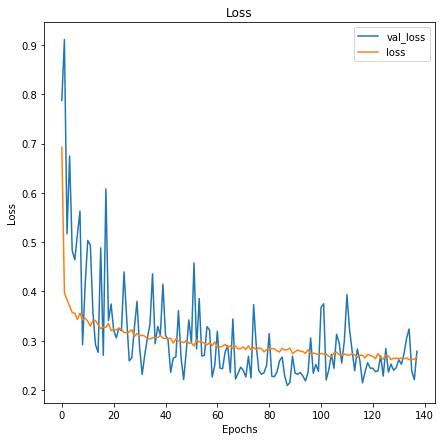

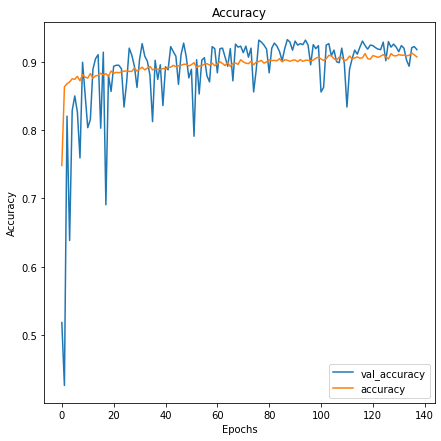

In [32]:
title = "../reports/SMOTE CNN Model: Iteration of Loss Graph"
ut.training_results_Loss(smote_cnn_history, title=title)
title = '../reports/SMOTE CNN Model: Iteration of Accuracy Graph'
ut.training_results_Accuracy(smote_cnn_history, title=title)

In [33]:
smote_cnn_predictions = smote_cnn_saved_model.predict_classes(val_images)
smote_cnn_cm = confusion_matrix(val_y, smote_cnn_predictions, labels=[0,1])
ut.cm_df(smote_cnn_cm, index, columns)

,Predicted Malig,Predicted Benign
Actual Malig,90,31
Actual Benign,34,598


Although accuracy has gone down by 2%, more true positive (Malignant) is detected.

## Adasyn CNN Model

In [34]:
filepath = '../models/adasyn_cnn.h5'
adasyn_cnn_model, adasyn_cnn_history = CNN_model(adasyn_images, adasyn_labels, 
                                               test_images, test_y,
                                               filepath=filepath,
                                               epochs=200,
                                               batch_size=32)

Epoch 1/200
290/290 [==============================] - 58s 201ms/step - loss: 0.7055 - accuracy: 0.7543 - val_loss: 0.5446 - val_accuracy: 0.8140
Epoch 2/200
290/290 [==============================] - 53s 183ms/step - loss: 0.4480 - accuracy: 0.8267 - val_loss: 0.4413 - val_accuracy: 0.8502
Epoch 3/200
290/290 [==============================] - 56s 194ms/step - loss: 0.4054 - accuracy: 0.8397 - val_loss: 0.4813 - val_accuracy: 0.8339
Epoch 4/200
290/290 [==============================] - 54s 186ms/step - loss: 0.3903 - accuracy: 0.8501 - val_loss: 0.3298 - val_accuracy: 0.9077
Epoch 5/200
290/290 [==============================] - 54s 186ms/step - loss: 0.3756 - accuracy: 0.8570 - val_loss: 0.3374 - val_accuracy: 0.8989
Epoch 6/200
290/290 [==============================] - 54s 185ms/step - loss: 0.3634 - accuracy: 0.8626 - val_loss: 0.3362 - val_accuracy: 0.8989
Epoch 7/200
290/290 [==============================] - 54s 185ms/step - loss: 0.3481 - accuracy: 0.8698 - val_loss: 0.3140 -

Epoch 57/200
290/290 [==============================] - 56s 192ms/step - loss: 0.2482 - accuracy: 0.9130 - val_loss: 0.1718 - val_accuracy: 0.9498
Epoch 58/200
290/290 [==============================] - 57s 198ms/step - loss: 0.2469 - accuracy: 0.9132 - val_loss: 0.1675 - val_accuracy: 0.9506
Epoch 59/200
290/290 [==============================] - 56s 193ms/step - loss: 0.2450 - accuracy: 0.9119 - val_loss: 0.1780 - val_accuracy: 0.9483
Epoch 60/200
290/290 [==============================] - 57s 195ms/step - loss: 0.2434 - accuracy: 0.9152 - val_loss: 0.1672 - val_accuracy: 0.9491
Epoch 61/200
290/290 [==============================] - 59s 203ms/step - loss: 0.2413 - accuracy: 0.9142 - val_loss: 0.1707 - val_accuracy: 0.9498
Epoch 62/200
290/290 [==============================] - 58s 200ms/step - loss: 0.2434 - accuracy: 0.9104 - val_loss: 0.1697 - val_accuracy: 0.9461
Epoch 63/200
290/290 [==============================] - 58s 201ms/step - loss: 0.2385 - accuracy: 0.9145 - val_loss: 0

In [35]:
adasyn_cnn_saved_model = load_model(filepath)

adasyn_cnn_results_train = adasyn_cnn_saved_model.evaluate(adasyn_images, adasyn_labels)
print(f'Training Loss: {adasyn_cnn_results_train[0]:.3} \nTraining Accuracy: {adasyn_cnn_results_train[1]:.3}')

print('----------')

adasyn_cnn_results_test = adasyn_cnn_saved_model.evaluate(val_images, val_y)
print(f'Test Loss: {adasyn_cnn_results_test[0]:.3} \nTest Accuracy: {adasyn_cnn_results_test[1]:.3}')

290/290 [==============================] - 11s 37ms/step - loss: 0.2567 - accuracy: 0.9005
Training Loss: 0.257 
Training Accuracy: 0.9
----------
24/24 [==============================] - 1s 45ms/step - loss: 0.1913 - accuracy: 0.9456
Test Loss: 0.191 
Test Accuracy: 0.946


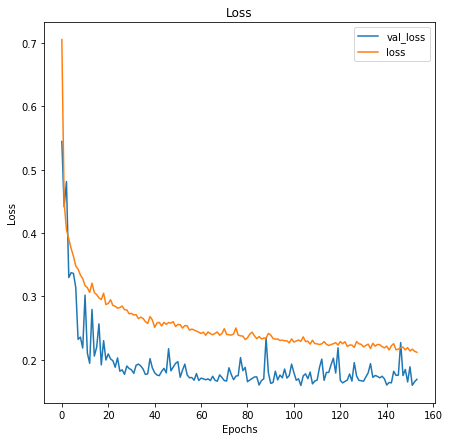

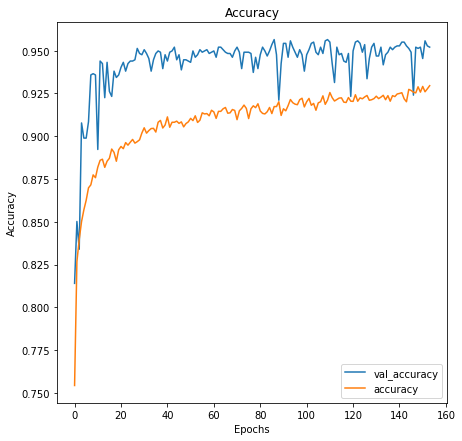

In [37]:
title = "../reports/ADASYN CNN Model: Iteration of Loss Graph"
ut.training_results_Loss(adasyn_cnn_history, title=title)
title = '../reports/ADASYN CNN Model: Iteration of Accuracy Graph'
ut.training_results_Accuracy(adasyn_cnn_history, title=title)

In [38]:
adasyn_cnn_predictions = adasyn_cnn_saved_model.predict_classes(val_images)
adasyn_cnn_cm = confusion_matrix(val_y, adasyn_cnn_predictions, labels=[0,1])
ut.cm_df(adasyn_cnn_cm, index, columns)

,Predicted Malig,Predicted Benign
Actual Malig,92,29
Actual Benign,12,620


The overall accuracy of the model is at 94.6% which is the highest results in all models. The model is under trained and there is a potential to increase the accuracy.

## Conclusion

Adasyn CNN model so far exhibits the highest accuracy and satisfying precesion and recall rates. 

Next, pretrained model will be tested.